# 0.Load data from netCDF file

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

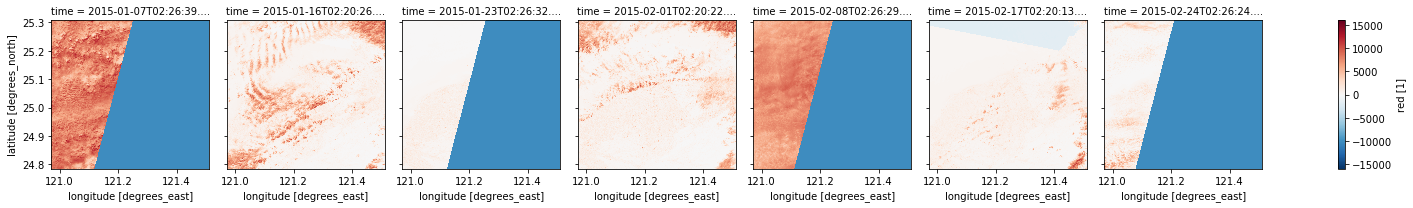

In [2]:
import os
path = os.path.abspath('.') 
dataset = xr.open_dataset(path + '/test.nc')
dataset.red.plot(col = 'time')

In [3]:
dataset

<xarray.Dataset>
Dimensions:    (latitude: 1942, longitude: 2001, time: 7)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-07T02:26:39.138373 ... 2015-02-24T02:26:24.238678
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 ... 24.78 24.78 24.78
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 ... 121.5 121.5 121.5
Data variables:
    red        (time, latitude, longitude) int16 ...
    green      (time, latitude, longitude) int16 ...
    blue       (time, latitude, longitude) int16 ...
    nir        (time, latitude, longitude) int16 ...
    swir1      (time, latitude, longitude) int16 ...
    swir2      (time, latitude, longitude) int16 ...
    pixel_qa   (time, latitude, longitude) uint16 ...
Attributes:
    crs:      EPSG:4326

# 1.Xarray DataArray create

In [4]:
import numpy as np
data = np.random.rand(4, 3)
data

array([[0.16968425, 0.76822169, 0.0330389 ],
       [0.09967794, 0.82833025, 0.85374886],
       [0.14732741, 0.12793306, 0.28503351],
       [0.95375269, 0.87339295, 0.46031734]])

In [5]:
locs = ['IA', 'IL', 'IN']

In [6]:
import pandas as pd
times = pd.date_range('2000-01-01', periods=4)
times

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

In [7]:
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.169684, 0.768222, 0.033039],
       [0.099678, 0.82833 , 0.853749],
       [0.147327, 0.127933, 0.285034],
       [0.953753, 0.873393, 0.460317]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [8]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.169684, 0.768222, 0.033039],
       [0.099678, 0.82833 , 0.853749],
       [0.147327, 0.127933, 0.285034],
       [0.953753, 0.873393, 0.460317]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [9]:
xr.DataArray(data, coords={'time': times, 'space': locs, 'const': 42, 'ranking': ('space', [1, 2, 3])}, dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.169684, 0.768222, 0.033039],
       [0.099678, 0.82833 , 0.853749],
       [0.147327, 0.127933, 0.285034],
       [0.953753, 0.873393, 0.460317]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

# 2.DataArray instruction

In [10]:
foo.values

array([[0.16968425, 0.76822169, 0.0330389 ],
       [0.09967794, 0.82833025, 0.85374886],
       [0.14732741, 0.12793306, 0.28503351],
       [0.95375269, 0.87339295, 0.46031734]])

In [11]:
foo.dims

('time', 'space')

In [12]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [13]:
foo.attrs

OrderedDict()

In [14]:
foo.values = 2.0 * foo.values
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.339368, 1.536443, 0.066078],
       [0.199356, 1.65666 , 1.707498],
       [0.294655, 0.255866, 0.570067],
       [1.907505, 1.746786, 0.920635]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [15]:
foo.attrs['units'] = 'meters'
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.339368, 1.536443, 0.066078],
       [0.199356, 1.65666 , 1.707498],
       [0.294655, 0.255866, 0.570067],
       [1.907505, 1.746786, 0.920635]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [16]:
foo.name = 'foo'
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[0.339368, 1.536443, 0.066078],
       [0.199356, 1.65666 , 1.707498],
       [0.294655, 0.255866, 0.570067],
       [1.907505, 1.746786, 0.920635]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

# 3.Xarray Dataset create

In [17]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
temp

array([[[19.74638295, 14.25246334,  1.9358135 ],
        [ 8.64514643, 10.8994622 , 12.94151287]],

       [[15.76194863,  8.65491068, 21.32285659],
        [ 1.46771659, 33.22746318,  1.61422154]]])

In [18]:
precip = 10 * np.random.rand(2, 2, 3)
precip

array([[[9.82028785, 8.2433053 , 4.05482869],
        [7.64328595, 2.74751988, 8.18593987]],

       [[6.58518804, 0.82218963, 7.65197055],
        [0.62998913, 7.65343086, 4.63297582]]])

In [19]:
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lon

[[-99.83, -99.32], [-99.79, -99.23]]

In [20]:
lat = [[42.25, 42.21], [42.63, 42.59]]
lat

[[42.25, 42.21], [42.63, 42.59]]

In [21]:
ds = xr.Dataset({'temperature': (['x', 'y', 'time'],  temp),
                 'precipitation': (['x', 'y', 'time'], precip)},
                coords={'lon': (['x', 'y'], lon),
                        'lat': (['x', 'y'], lat),
                        'time': pd.date_range('2014-09-06', periods=3),
                        'reference_time': pd.Timestamp('2014-09-05')})
ds

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 19.75 14.25 1.936 ... 1.468 33.23 1.614
    precipitation   (x, y, time) float64 9.82 8.243 4.055 ... 0.63 7.653 4.633

In [22]:
xr.Dataset({'bar': foo}) #將DataArray foo導入dataset

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.3394 1.536 0.06608 ... 1.908 1.747 0.9206

# 4.Dataset instruction

In [23]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[19.746383, 14.252463,  1.935813],
        [ 8.645146, 10.899462, 12.941513]],

       [[15.761949,  8.654911, 21.322857],
        [ 1.467717, 33.227463,  1.614222]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [24]:
ds.data_vars

Data variables:
    temperature    (x, y, time) float64 19.75 14.25 1.936 ... 1.468 33.23 1.614
    precipitation  (x, y, time) float64 9.82 8.243 4.055 ... 0.63 7.653 4.633

In [25]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [26]:
ds.attrs

OrderedDict()

In [27]:
ds.attrs['title'] = 'example attribute'
ds

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 19.75 14.25 1.936 ... 1.468 33.23 1.614
    precipitation   (x, y, time) float64 9.82 8.243 4.055 ... 0.63 7.653 4.633
Attributes:
    title:    example attribute

In [28]:
ds[['temperature']]

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    lat             (x, y) float64 42.25 42.21 42.63 42.59
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 19.75 14.25 1.936 ... 1.468 33.23 1.614
Attributes:
    title:    example attribute

In [29]:
ds.drop('temperature')

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    precipitation   (x, y, time) float64 9.82 8.243 4.055 ... 0.63 7.653 4.633
Attributes:
    title:    example attribute

In [30]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*
Attributes:
    title:    example attribute

In [31]:
ds.assign(temperature2 = 2 * ds.temperature)

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 19.75 14.25 1.936 ... 1.468 33.23 1.614
    precipitation   (x, y, time) float64 9.82 8.243 4.055 ... 0.63 7.653 4.633
    temperature2    (x, y, time) float64 39.49 28.5 3.872 ... 2.935 66.45 3.228
Attributes:
    title:    example attribute

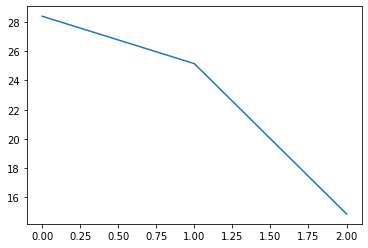

In [32]:
plt.plot((2 * ds.temperature.sel(x=0)).mean('y'))

In [33]:
ds['time'].to_index()

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [34]:
ds.indexes

time: DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

# 5.Example

In [54]:
green = dataset.green
green.values

array([[[ 7932,  7749,  7682, ..., -9999, -9999, -9999],
        [ 7881,  7763,  7695, ..., -9999, -9999, -9999],
        [ 7911,  7808,  7743, ..., -9999, -9999, -9999],
        ...,
        [ 7451,  7415,  7359, ..., -9999, -9999, -9999],
        [ 7414,  7381,  7404, ..., -9999, -9999, -9999],
        [ 7461,  7417,  7481, ..., -9999, -9999, -9999]],

       [[  576,   597,   613, ...,  6026,  6025,  6194],
        [  609,   584,   583, ...,  5772,  6003,  6404],
        [  573,   566,   557, ...,  5967,  6411,  6838],
        ...,
        [ 4538,  4817,  4860, ...,   307,   239,   247],
        [ 4513,  4851,  5107, ...,   312,   258,   238],
        [ 4637,  5061,  5262, ...,   281,   297,   280]],

       [[  400,   396,   396, ..., -9999, -9999, -9999],
        [  401,   392,   398, ..., -9999, -9999, -9999],
        [  403,   394,   389, ..., -9999, -9999, -9999],
        ...,
        [  592,   460,   531, ..., -9999, -9999, -9999],
        [  633,   707,   827, ..., -9999, -99

In [48]:
value = green.where(dataset.pixel_qa == 322).fillna(-9999).values
value

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ...,   307.,   239.,   247.],
        [-9999., -9999., -9999., ...,   312.,   258.,   238.],
        [-9999., -9999., -9999., ...,   281.,   297.,   280.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [  5

In [49]:
value.shape

(7, 1942, 2001)

In [50]:
new = value.reshape(7,1,1942*2001)
new

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ...,   281.,   297.,   280.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       ...,

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.]]])

In [58]:
stack = np.zeros((1, 1942*2001),dtype=np.int16)
for i in range(1942*2001):
    for j in range(7):
        if new[j][0][i] != -9999:
            stack[0][i] = new[j][0][i]
            break
        if j == 6:
            stack[0][i] = -9999
stack

array([[-9999, -9999, -9999, ...,   281,   297,   280]], dtype=int16)

In [62]:
reshape = stack.reshape(1942,2001)
reshape

array([[-9999, -9999, -9999, ...,  3885,  4161,  4676],
       [-9999, -9999, -9999, ...,  4012,  4163,  4439],
       [-9999, -9999, -9999, ...,  4041,  4126,  4405],
       ...,
       [  592,   460,   531, ...,   307,   239,   247],
       [  633,   707,   827, ...,   312,   258,   238],
       [  920,   782,   877, ...,   281,   297,   280]], dtype=int16)

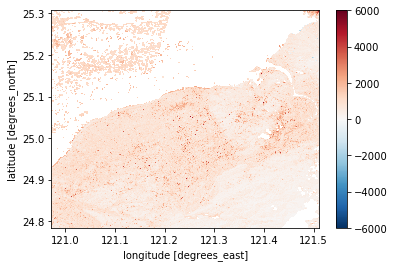

In [78]:
green_stack = xr.DataArray(reshape, coords = dataset.drop_dims('time').coords)
green_stack.where(green_stack != -9999).plot()

In [87]:
green_stack.to_pandas()

longitude,120.97248113553972,120.97275063012496,120.97302012471019,120.97328961929543,120.97355911388067,120.97382860846591,120.97409810305113,120.97436759763637,120.97463709222161,120.97490658680685,...,121.5090448547446,121.50931434932984,121.50958384391507,121.5098533385003,121.51012283308555,121.51039232767079,121.51066182225601,121.51093131684125,121.51120081142649,121.51147030601172
latitude,,,,,,,,,,,,,,,,,,,,,
25.307024,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,4411,4849,4434,4434,3779,3743,3840,3885,4161,4676
25.306754,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,4607,4599,4110,4110,3856,3948,3804,4012,4163,4439
25.306485,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,3680,3935,4021,4021,4206,4358,4066,4041,4126,4405
25.306215,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,3238,3508,3697,3697,3729,3839,4052,3973,4218,4563
25.305946,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,3744,3932,3774,3774,3299,3352,3656,4070,4524,4824
25.305676,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,3839,4137,4242,4242,3519,3117,3562,3937,4267,4432
25.305407,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,3662,4322,4314,4314,3974,3788,4061,4100,3705,3719
25.305137,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,3862,4392,4223,4223,4186,4290,4261,4317,3882,3971
25.304868,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,4086,4322,4322,4305,4422,4532,4517,4422,4387,4454


In [79]:
#red
new = dataset.red.where(dataset.pixel_qa == 322).fillna(-9999).values.reshape(7,1,1942*2001)
stack = np.zeros((1, 1942*2001),dtype=np.int16)
for i in range(1942*2001):
    for j in range(7):
        if new[j][0][i] != -9999:
            stack[0][i] = new[j][0][i]
            break
        if j == 6:
            stack[0][i] = -9999
red_stack = xr.DataArray(stack.reshape(1942,2001), coords = dataset.drop_dims('time').coords)

<xarray.DataArray (latitude: 1942, longitude: 2001)>
array([[-9999, -9999, -9999, ...,  3978,  4265,  4809],
       [-9999, -9999, -9999, ...,  4110,  4254,  4534],
       [-9999, -9999, -9999, ...,  4171,  4218,  4529],
       ...,
       [  607,   441,   501, ...,   227,   134,   130],
       [  637,   742,   871, ...,   218,   140,   123],
       [  947,   793,   937, ...,   167,   163,   158]], dtype=int16)
Coordinates:
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 ... 24.78 24.78 24.78
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 ... 121.5 121.5 121.5

In [80]:
#blue
new = dataset.blue.where(dataset.pixel_qa == 322).fillna(-9999).values.reshape(7,1,1942*2001)
stack = np.zeros((1, 1942*2001),dtype=np.int16)
for i in range(1942*2001):
    for j in range(7):
        if new[j][0][i] != -9999:
            stack[0][i] = new[j][0][i]
            break
        if j == 6:
            stack[0][i] = -9999
blue_stack = xr.DataArray(stack.reshape(1942,2001), coords = dataset.drop_dims('time').coords)

In [82]:
combine = xr.Dataset({'green': green_stack, 'red':red_stack, 'blue':blue_stack})
combine

<xarray.Dataset>
Dimensions:    (latitude: 1942, longitude: 2001)
Coordinates:
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 ... 24.78 24.78 24.78
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 ... 121.5 121.5 121.5
Data variables:
    green      (latitude, longitude) int16 -9999 -9999 -9999 ... 281 297 280
    red        (latitude, longitude) int16 -9999 -9999 -9999 ... 167 163 158
    blue       (latitude, longitude) int16 -9999 -9999 -9999 ... 109 124 109

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


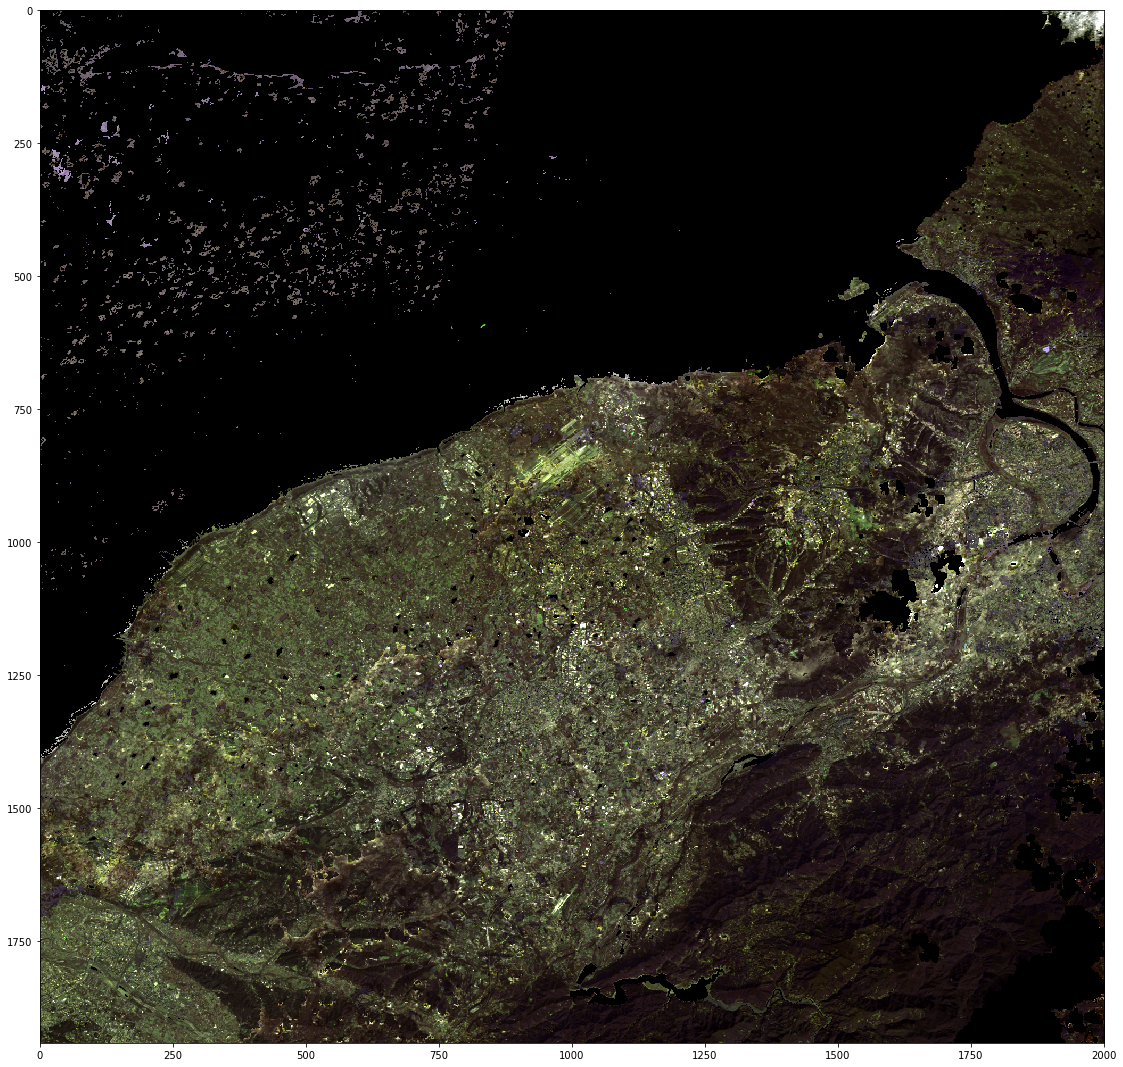

In [85]:
rbg = combine.to_array(dim='color').transpose('latitude', 'longitude', 'color')
fake_saturation = 3000
clipped_visible = rbg.where(rbg < fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['latitude', 'longitude'])
scaled = (clipped_visible / max_val)
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')